## Assignment 8 Flight Data

Analyze the data and create a processing pipeline. We are interested if we can predict whether a flight gets delayed or not (arr_delay).
Fit a logistic regression, decision tree, and SVM using grid search. Discuss the performance of each model.
Fit an ensemble using the three above models. Does this improvement performance?
Fit a model using AdaBoost. Does this improve performance?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
flt = pd.read_csv('flight-data.csv')

In [7]:
pd.options.display.max_rows = 999

In [8]:
flt.head(10)

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0
5,UA,1519,N16701,EWR,STT,199.0,1634,9,22,57.92,...,0.0,1030.1,10.0,Fixed wing multi engine,BOEING,737-724,2.0,149.0,Turbo-jet,0.0
6,UA,436,N471UA,EWR,FLL,138.0,1065,20,0,78.98,...,0.0,1016.2,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-232,2.0,200.0,Turbo-fan,1.0
7,UA,322,N844UA,LGA,CLE,67.0,419,15,35,82.94,...,0.0,1012.8,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-131,2.0,179.0,Turbo-jet,0.0
8,WN,124,N7741C,LGA,MDW,105.0,725,9,30,60.08,...,0.0,1024.0,10.0,Fixed wing multi engine,BOEING,737-7BD,2.0,149.0,Turbo-fan,0.0
9,B6,1443,N348JB,EWR,PBI,152.0,1023,17,24,33.98,...,0.0,1023.8,10.0,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW,2.0,20.0,Turbo-fan,1.0


In [9]:
flt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

This was the error message displayed if we donot carry the NA step "Input contains NaN, infinity or a value too large for dtype('float64')."

In [10]:
flt = flt[flt['arr_delay'].notna()]

In [11]:
flt.isnull().sum()

carrier            0
flight             0
tailnum            0
origin             0
dest               0
air_time           0
distance           0
hour               0
minute             0
temp              48
dewp              48
humid             48
wind_dir         265
wind_speed        49
wind_gust       7433
precip            46
pressure        1111
visib             46
type            1365
manufacturer    1365
model           1365
engines         1365
seats           1365
engine          1365
arr_delay          0
dtype: int64

Dropping them because we don't need them.

In [12]:
flt = flt.drop(['tailnum', 'flight'], axis=1)

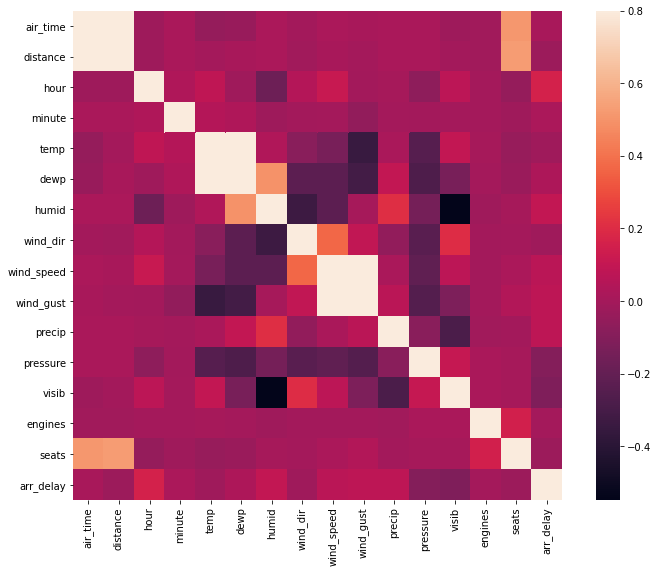

In [13]:
corrmat = flt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

array([[<AxesSubplot:title={'center':'air_time'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'minute'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'dewp'}>,
        <AxesSubplot:title={'center':'humid'}>,
        <AxesSubplot:title={'center':'wind_dir'}>],
       [<AxesSubplot:title={'center':'wind_speed'}>,
        <AxesSubplot:title={'center':'wind_gust'}>,
        <AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'pressure'}>],
       [<AxesSubplot:title={'center':'visib'}>,
        <AxesSubplot:title={'center':'engines'}>,
        <AxesSubplot:title={'center':'seats'}>,
        <AxesSubplot:title={'center':'arr_delay'}>]], dtype=object)

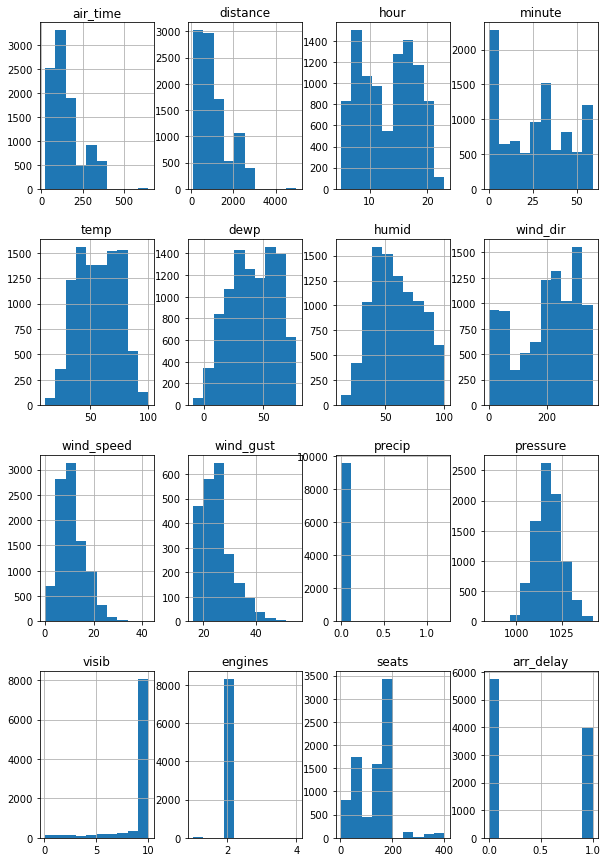

In [14]:
flt.hist(figsize=(10,15))

<AxesSubplot:>

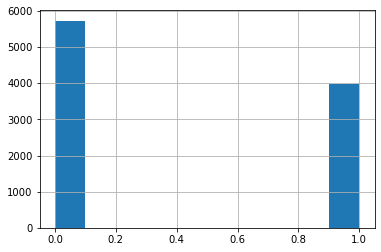

In [15]:
flt['arr_delay'].hist()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [17]:
X=flt.drop('arr_delay', axis=1)
y=flt['arr_delay']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 7,772
Test examples: 1,944


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_var = ['air_time','distance','hour','minute','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure'
          ,'visib','engines','seats']
cat_var = ['origin']

In [46]:
numeric_transformer =Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())])
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())])
processing_pipeline = ColumnTransformer(
                      transformers=[(
                      "cat", categorical_transformer, cat_var),
                      ("num", numeric_transformer, num_var)])
processing_pipeline

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['origin']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['air_time', 'distance', 'hour', 'minute',
                                  'temp', 'dewp', 'humid', 'wind_dir',
                                  'wind_speed', 'wind_gust', 'precip',
                                  'pressure', 'visib', 'engines', 'seats'])])

### Logistic Regression

In [47]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'classifier__C': (0.1, 1, 10, 100)}
log_reg= Pipeline(steps=[('pipeline', processing_pipeline), 
                     ('classifier', LogisticRegression(max_iter=1000))])
gs_lg = GridSearchCV(log_reg, params)

gs_lg.fit(X_train, y_train)
gs_lg.score(X_test, y_test)

0.6743827160493827

In [56]:
#clf1 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', random_state=0)
#pipe1 = Pipeline([('scaler', StandardScaler()),('logreg', clf1)])

gs_lg.best_score_

0.6722848618025468

### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_dt = Pipeline([('data_processing',processing_pipeline),('dtree',DecisionTreeClassifier())])
model_dt

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['origin']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['air_time', 'distance',
                                

In [24]:
griddt = [{ 'dtree__max_depth':[1,3,5,10,15,20]}]

gsdecision= GridSearchCV(estimator=model_dt, param_grid=griddt, scoring='roc_auc', refit=True)
gsdecision =gsdecision.fit(X_train,y_train)

In [25]:
gsdecision.best_score_

0.6425222142531053

Decision tree has less score than Logistic regression.

### Support Vector Machine

In [32]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

In [49]:
from sklearn.svm import SVC
gs_svm = modeling_pipeline = Pipeline([('data_processing',processing_pipeline),
                                       ('model', SVC(probability=True))])
param_grid = [
  {'model__C': [0.01, 0.1, 1, 10], 'model__kernel': ['linear']}
 ]

svm_results = GridSearchCV(estimator=gs_svm, param_grid=param_grid, scoring='roc_auc', refit=True)
svm_results = svm_results.fit(X_train,y_train)

In [50]:
svm_results.best_score_

0.7109862320810016

The Scores of the models are-

In [78]:
## Score in the order
print(f'Support Vector Machine Score: {svm_results.best_score_ *100}')
print(f'Logistic Regression Score: {gs_lg.best_score_ *100}')
print(f'Decision Tree Score: {gsdecision.best_score_ *100}')


Support Vector Machine Score: 71.09862320810016
Logistic Regression Score: 67.22848618025468
Decision Tree Score: 64.25222142531052


Here the SVM has better score of 71%. Second best is Logistic Regression with 67.2%.
SVM took too much time too run even though it has a better accuracy I would prefer LR.

### Ensemble

In [61]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', log_reg),('dt', model_dt),('svc', gs_svm)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

In [62]:
scores = cross_val_score(estimator=clf4, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.69 (+/- 0.01) [Ensemble]


### ADABoost

In [75]:
#From: https://machinelearningmastery.com/adaboost-ensemble-in-python/

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)

model = AdaBoostClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.806 (0.041)
